In [1]:
import numpy as np
import math as mt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Simpler Equations

def regression_analysis(x_data,y_data):
    
    # X Data 
    
    xbar = x_data.mean()
    print(f'xbar: {xbar}')
    sx2 = np.var(x_data,ddof=1)
    print(f'sx2: {sx2}')
    sx = np.std(x_data,ddof=1)
    print(f'sx: {sx}')
    Sxx = 0
    for i in x_data:
        Sxx += ((i - xbar)**2)
    print(f'Sxx: {Sxx}')
    
    print('')
    
    # Y Data
    
    ybar = y_data.mean()
    print(f'ybar: {ybar}')
    sy2 = np.var(y_data,ddof=1)
    print(f'sy2: {sy2}')
    sy = np.std(y_data,ddof=1)
    print(f'sy: {sy}')
    Syy = 0
    for i in y_data:
        Syy += ((i - ybar)**2)
    print(f'Syy: {Syy}')
    print('')
    
    # X Y Data
    
    
    xy = np.array([x,y])
    sxy = np.cov(xy)[0][1]
    
    def Sxy(x_data,y_data):
        
        def merge(x_data, y_data):
            new_arr = tuple(zip(x_data, y_data)) 
            return new_arr
        
        Sxy = 0
        
        for a,b in merge(x_data,y_data):
            Sxy += ((a - xbar) * (b- ybar))
        return Sxy
    Sxy = Sxy(x_data,y_data)
    print(f'Sxy: {Sxy}')
    
    def sxy(x_data,y_data):
        
        def merge(x_data, y_data):
            new_arr = tuple(zip(x_data, y_data)) 
            return new_arr
        
        Sxy = 0
        
        for a,b in merge(x_data,y_data):
            Sxy += ((a - xbar) * (b- ybar))
        return ((1/(len(merge(x_data,y_data))-1)) * Sxy)
    sxy = sxy(x_data,y_data)
    print(f'sxy: {sxy}')
    
    def r(x_data,y_data):
        sx = np.std(x_data,ddof=1)
        sy = np.std(y_data,ddof=1)
        r = ((sxy) / (sx * sy))
        return r
    r = r(x_data,y_data)
    print(f'r: {r}')
    print(f'r2: {r**2}')
    
    def b1(r,sy,sx):
        return r * (sy / sx)
    b1 = b1(r,sy,sx)
    print(f'b1: {b1}')
    
    def b0(ybar,b1,xbar):
        return ybar - (b1 * xbar)
    b0 = b0(ybar,b1,xbar)
    print(f'b0: {b0}')
    
    print('')
    
    def regression(x_data):
        y_values = []
        for i in x_data:
            y_values.append((b0 + (b1 * i)))
        y_val_arr = np.array(y_values)
        
        plt.figure(num = 2)
        plt.plot(x_data,y_val_arr)
        
        def merge(x_data, y_val_arr):
            new_arr = tuple(zip(x_data, y_val_arr)) 
            return new_arr
        
        return merge(x_data,y_val_arr)
    print(f'Regression Y Values: {regression(x_data)}')
    
    plt.figure(num = 2,figsize=(12,6))
    plt.scatter(x_data,y_data, marker = 'X', alpha = 1)
    plt.xlabel('X Values',fontsize=15)
    plt.ylabel('Y Values',fontsize=15)
    plt.title('Regression Analysis',fontsize=20)
    plt.show()
    
    print('')
    
    def error_terms(x_data,y_data):
        def regression_y_values(x_data):
            y_values = []
            for i in x_data:
                y_values.append((b0 + (b1 * i)))
            y_val_arr = np.array(y_values)
            return y_val_arr
        error_terms = y_data - regression_y_values(x_data)
        return error_terms
    print(f'Error terms: {error_terms(x_data,y_data)}')
    
    def avg_error_term(x_data,y_data):
        avg_error_term = error_terms(x_data,y_data).mean()
        return avg_error_term
    print(f'Average Error Term: {avg_error_term(x_data,y_data)}')
    
    def See(error_terms):
        See = (error_terms**2).sum()
        return See
    print(f'See: {See(error_terms(x_data,y_data))}')
    
    def s2e(error_terms):
        See = (error_terms**2).sum()
        return (1/ (len(error_terms) - 2) * See)
    print(f's2e: {s2e(error_terms(x_data,y_data))}')
    print(f'se: {mt.sqrt(s2e(error_terms(x_data,y_data)))}')
    


xbar: 15.0
sx2: 7.0
sx: 2.6457513110645907
Sxx: 28.0

ybar: 70.0
sy2: 500.0
sy: 22.360679774997898
Syy: 2000.0

Sxy: 230.0
sxy: 57.5
r: 0.971927392937794
r2: 0.9446428571428569
b1: 8.214285714285714
b0: -53.21428571428571

Regression Y Values: ((11, 37.14285714285714), (16, 78.21428571428571), (16, 78.21428571428571), (14, 61.78571428571428), (18, 94.64285714285712))


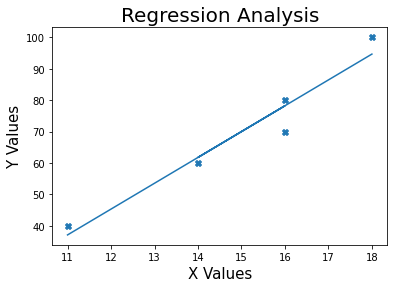


Error terms: [ 2.85714286  1.78571429 -8.21428571 -1.78571429  5.35714286]
Average Error Term: 8.526512829121202e-15
See: 110.71428571428584
s2e: 36.90476190476194
se: 6.074928962939562


In [3]:
x = np.array([11,16,16,14,18])
y = np.array([40,80,70,60,100])

regression_analysis(x,y)

xbar: 3.0
sx2: 2.5
sx: 1.5811388300841898
Sxx: 10.0

ybar: 5.0
sy2: 7.5
sy: 2.7386127875258306
Syy: 30.0

Sxy: 10.0
sxy: 2.5
r: 0.5773502691896257
r2: 0.3333333333333333
b1: 0.9999999999999999
b0: 2.0000000000000004

Regression Y Values: ((1, 3.0000000000000004), (5, 7.0), (2, 4.0), (4, 6.0), (3, 5.0))


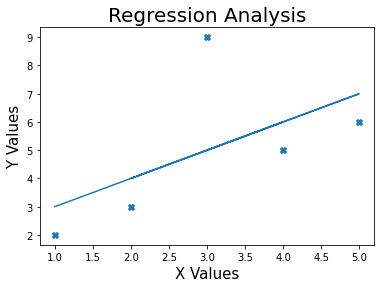


Error terms: [-1. -1. -1. -1.  4.]
Average Error Term: 0.0
See: 20.0
s2e: 6.666666666666666
se: 2.581988897471611


In [4]:
a = np.array([1,5,2,4,3])
b = np.array([2,6,3,5,9])

regression_analysis(a,b)

In [5]:
'''

# Equations

x = np.array([11,16,16,14,18])
y = np.array([40,80,70,60,100])

def stat_analysis(x_data,y_data):
    
    # X Data 
    
    xbar = x_data.mean()
    print(f'xbar: {xbar}')
    sx2 = np.var(x_data,ddof=1)
    print(f'sx2: {sx2}')
    sx = np.std(x_data,ddof=1)
    print(f'sx: {sx}')
    sxx = 0
    for i in x_data:
        sxx += ((i - xbar)**2)
    print(f'sxx: {sxx}')
    # Y Data
    
    ybar = y_data.mean()
    print(f'ybar: {ybar}')
    sy2 = np.var(y_data,ddof=1)
    print(f'sy2: {sy2}')
    sy = np.std(y_data,ddof=1)
    print(f'sy: {sy}')
    syy = 0
    for i in y_data:
        syy += ((i - ybar)**2)
    print(f'syy: {syy}')
    # X Y Data
    
    
    xy = np.array([x,y])
    sxy = np.cov(xy)[0][1]
    
    def sxy(x_data,y_data):
        
        def merge(x_data, y_data):
            new_arr = tuple(zip(x_data, y_data)) 
            return new_arr
        
        Sxy = 0
        
        for a,b in merge(x_data,y_data):
            Sxy += ((a - 15) * (b- 70))
        return ((1/(len(merge(x_data,y_data))-1)) * Sxy)
    print(f'sxy: {sxy(x_data,y_data)}')
    
    def r(x_data,y_data):
        sx = np.std(x_data,ddof=1)
        sy = np.std(y_data,ddof=1)
        sxy1 = sxy(x_data,y_data)
        r = ((sxy1) / (sx * sy))
        return r
    print(f'r: {r(x_data,y_data)}')
    
    def r2(r):
        return r**2
    print(f'r2: {r2(r(x_data,y_data))}')
    
    def b1(r,sy,sx):
        return r * (sy / sx)
    print(f'b1: {b1(r(x_data,y_data),sy,sx)}')
    
    def b0(ybar,b1,xbar):
        return ybar - (b1 * xbar)
    print(f'b0: {b0(ybar,b1(r(x_data,y_data),sy,sx),xbar)}')
    
    def regression(x):
        
        return None
'''

"\n\n# Equations\n\nx = np.array([11,16,16,14,18])\ny = np.array([40,80,70,60,100])\n\ndef stat_analysis(x_data,y_data):\n    \n    # X Data \n    \n    xbar = x_data.mean()\n    print(f'xbar: {xbar}')\n    sx2 = np.var(x_data,ddof=1)\n    print(f'sx2: {sx2}')\n    sx = np.std(x_data,ddof=1)\n    print(f'sx: {sx}')\n    sxx = 0\n    for i in x_data:\n        sxx += ((i - xbar)**2)\n    print(f'sxx: {sxx}')\n    # Y Data\n    \n    ybar = y_data.mean()\n    print(f'ybar: {ybar}')\n    sy2 = np.var(y_data,ddof=1)\n    print(f'sy2: {sy2}')\n    sy = np.std(y_data,ddof=1)\n    print(f'sy: {sy}')\n    syy = 0\n    for i in y_data:\n        syy += ((i - ybar)**2)\n    print(f'syy: {syy}')\n    # X Y Data\n    \n    \n    xy = np.array([x,y])\n    sxy = np.cov(xy)[0][1]\n    \n    def sxy(x_data,y_data):\n        \n        def merge(x_data, y_data):\n            new_arr = tuple(zip(x_data, y_data)) \n            return new_arr\n        \n        Sxy = 0\n        \n        for a,b in merge(x_d

In [6]:
(.57735) * (2.7386/1.58)

1.0007156392405063